In [ ]:
# --- Notebook: EDA & PCA Visualization Toolkit ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# --- Load Your Saved Feature Set ---
df = pd.read_parquet("selected_features_83.parquet")

# --- Optional: Load Market Labels for Coloring ---
labels = pd.read_parquet("rare__final_merged_dataset.parquet")
labels = labels[['date', 'market_stress_flag', 'market_shock_flag']]
df = pd.merge(df, labels, on='date', how='left')

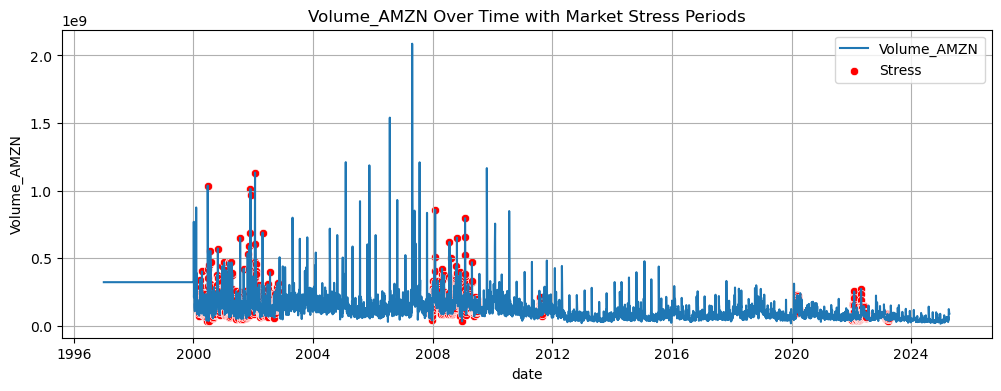

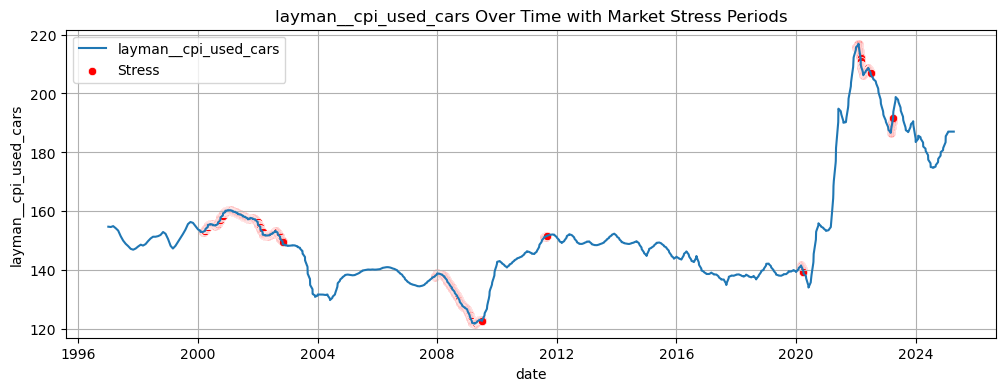

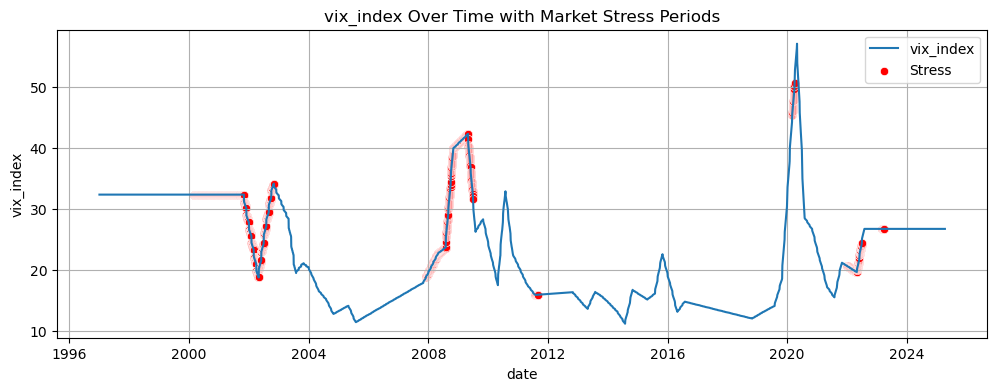

In [5]:
# --- Step 1: Time Series Exploration ---
plot_features = ['Volume_AMZN', 'layman__cpi_used_cars', 'vix_index']

for col in plot_features:
    plt.figure(figsize=(12, 4))
    sns.lineplot(data=df, x='date', y=col, label=col)
    sns.scatterplot(data=df[df['market_stress_flag'] == 1], x='date', y=col, color='red', label='Stress')
    plt.title(f"{col} Over Time with Market Stress Periods")
    plt.grid()
    plt.legend()
    plt.show()

In [7]:
# --- Step 2: PCA (Standardized) ---
X = df.drop(columns=['date', 'market_stress_flag', 'market_shock_flag'])
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_proj = pca.fit_transform(X_scaled)

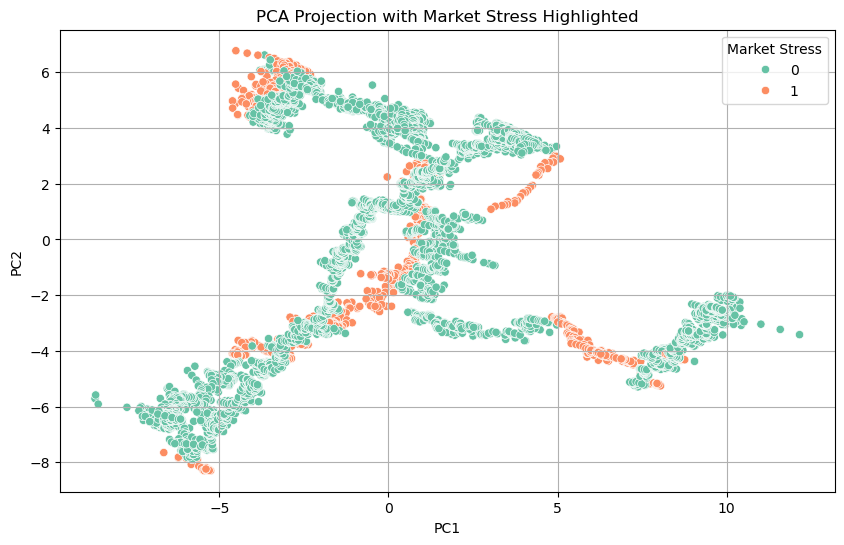

In [9]:
# --- Step 3: 2D PCA Plot ---
pca_df = pd.DataFrame(pca_proj, columns=['PC1', 'PC2'])
pca_df['market_stress_flag'] = df['market_stress_flag'].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='market_stress_flag', palette='Set2')
plt.title("PCA Projection with Market Stress Highlighted")
plt.grid()
plt.legend(title='Market Stress')
plt.show()

In [11]:
# --- Step 4: View PCA Component Loadings ---
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PC1', 'PC2'])
print("Top drivers of PC1:")
print(loadings['PC1'].sort_values(ascending=False).head(10))

print("\nTop drivers of PC2:")
print(loadings['PC2'].sort_values(ascending=False).head(10))

Top drivers of PC1:
linchpin__nonfarm_payrolls       0.210761
layman__housing_prices           0.208520
Adj Close_^IXIC                  0.192425
layman__total_consumer_credit    0.190428
layman__job_openings_total       0.186237
layman__durable_goods_orders     0.180255
High_AMD                         0.178524
layman__water_bill_index         0.168457
High_CSCO                        0.164815
layman__industrial_production    0.152748
Name: PC1, dtype: float64

Top drivers of PC2:
Consumer Sentiment                                            0.189770
Consumer Sentiment_lag30_lag90                                0.187473
Consumer Sentiment_lag90_rolling90_rolling180                 0.185730
Consumer Sentiment_lag30                                      0.185549
Consumer Sentiment_lag90                                      0.182905
linchpin__consumer_sentiment_index                            0.182848
Consumer Sentiment_lag30_lag90_lag180_rolling90_rolling180    0.181506
Consumer Sentime